In [70]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as unit #woo units
from astropy.visualization import quantity_support
quantity_support()

C:\Users\andre\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x1080b190>

In [18]:
#Equation to handle calculating gravitational force
def Gravity_Force(mass, g):
    return((mass*g).to(unit.N))

In [151]:
#Testing some drag, linear for now. dragparam has units mass/time
def Drag_Force(dragparam, v0):
    return(dragparam * -v0).to(unit.N)

In [230]:
#Equation to give an accelleration by combining all relevant forces
def Accelleration_Calculator(mass, g, dragparam, v0, a0):
    return((Gravity_Force(mass, g) + Drag_Force(dragparam, v0)) / mass).to(unit.m/(unit.s)**2) + a0

In [233]:
#Equation to work with our accellerations and our time intervals
def Velocity_Calculator(mass, g, dragparam, dtime, v0, a0):
    return (Accelleration_Calculator(mass, g, dragparam, v0, a0) * dtime + v0).to(unit.m/unit.s)

In [235]:
#Equation to go from velocity to position
def Position_Calculator(mass, g, dragparam, dtime, v0, p0, a0):
    return(Velocity_Calculator(mass, g, dragparam, dtime, v0, a0) * dtime + p0).to(unit.m)

OK Functions done, now time for interface

In [199]:
#TODO List
#Change everything to work off of altitudes
    #Distance from planet center, distance from planet initial,  distance from planet center to surface
    #This way we know when we hit ground and can simulate atmosphere as a function of radius
#Figure out our drag equation
#Experiment?

In [ ]:
#Euler's Method for Falling Object

In [251]:
#The Experiment Setup
mass = 3 * unit.kg                        #mass
g = 9.8 * (unit.m/(unit.s**2))            #gravitational accelleration
dragparam = 0.05 * (unit.kg/unit.s)       #drag parameter (Right now linear drag)
a0 = 0 * (unit.m/(unit.s**2))             #initial accelleration for completeness
v0 = 0 * (unit.m/unit.s)                  #initial velocity
p0 = 0 * unit.m                           #initial position
time_end = 100                            #simulation length (units added later)
time_interval = .1                        #time interval (dTime size)

C:\Users\andre\Anaconda3\lib\site-packages\astropy\units\quantity.py:673: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


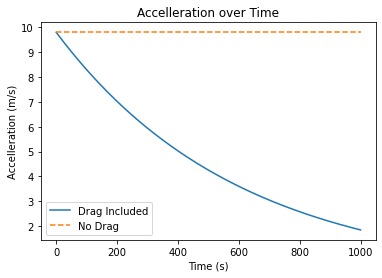

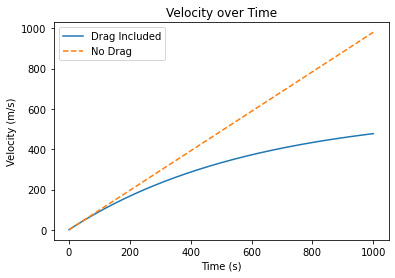

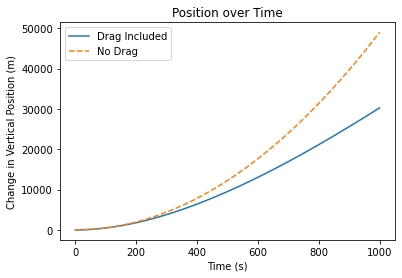

In [253]:
#This will setup a discrete Time coordinate, as well as handle dtime calculation
TimeSteps = np.linspace(0, time_end, int(time_end/time_interval + 1)) * unit.s #This will do 0-100 seconds, .1 second interval
dTimeSteps = (np.zeros(int(time_end/time_interval + 1)) + time_interval) * unit.s

#This function will run through and calculate all the velocities at out time steps
#The velocities are absolute velocities at that time (not dVelocity), function makes sure to factor in previous velocity
VelocityValues = [v0]
for i in range(len(dTimeSteps)):
    VelocityValues.append(Velocity_Calculator(mass, g, dragparam, dTimeSteps[i], VelocityValues[i], a0))

#This function will run through and calculate all the positions at out time steps
#The positions are absolute positions at that time (not dPosition), function makes sure to factor in previous positions
PositionValues = [p0]
for i in range(len(dTimeSteps)):
    PositionValues.append(Position_Calculator(mass, g, dragparam, dTimeSteps[i], VelocityValues[i], PositionValues[i], a0))

#On the fly here but want to also show accellerations
AccellerationValues = [a0]
for i in range(len(dTimeSteps)):
    AccellerationValues.append(Accelleration_Calculator(mass, g, dragparam, VelocityValues[i], a0))
    
    
    
    
    
    
    
######################################################################################    
temp=[]
for i in range(len(AccellerationValues)): #I dislike this workaround greatly, I will find a better way
    temp.append(AccellerationValues[i].value)
temp = temp[1:] #Small adjustment, remove first entry as Euler's Method has weird artifacts here
plt.figure(3)
plt.plot(temp, label = 'Drag Included')
plt.title('Accelleration over Time')
plt.ylabel('Accelleration (m/s)')
plt.xlabel('Time (s)')

plt.plot(TimeSteps/TimeSteps * 9.8, linestyle = '--', label = 'No Drag') #This shows continuous expected

plt.legend()    
#######################################################################################    
temp=[]
for i in range(len(VelocityValues)): #I dislike this workaround greatly, I will find a better way
    temp.append(VelocityValues[i].value)
temp = temp[1:] #Small adjustment, remove first entry as Euler's Method has weird artifacts here
plt.figure(1)
plt.plot(temp, label = 'Drag Included')
plt.title('Velocity over Time')
plt.ylabel('Velocity (m/s)')
plt.xlabel('Time (s)')

plt.plot(TimeSteps * 9.8, linestyle = '--', label = 'No Drag') #This shows continuous expected

plt.legend()
######################################################################################
temp=[]
for i in range(len(PositionValues)): #I dislike this workaround greatly, I will find a better way
    temp.append(PositionValues[i].value)
temp = temp[1:] #Small adjustment, remove first entry as Euler's Method has weird artifacts here
plt.figure(2)
plt.plot(temp, label = 'Drag Included')
plt.title('Position over Time')
plt.ylabel('Change in Vertical Position (m)')
plt.xlabel('Time (s)')

plt.plot(TimeSteps**2 * 9.8/2, linestyle = '--', label = 'No Drag') #This shows continuous expected

plt.legend()